# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Weather_Features.csv for forecasting temperature in Spain

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0514_Weather_Energy.csv', parse_dates=['date_time'], index_col='date_time')

#Drop columns not pertaining to temp
df.drop(['load', 'price'], axis =1, inplace = True)

# Data Overview

**Data Dictionary**

* **date_time**: Datetime index localized to CET
* **temp**: hourly temperature(F) in Spain
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording

**Data Preview**

In [4]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35072, 6)


,temp,date,time,weekday,month,year
date_time,,,,,,
2015-01-01 00:00:00,30.814633,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,30.852860,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,30.108448,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,30.091044,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,30.192620,2015-01-01,04:00:00,Thursday,January,2015


**About the data**

In [5]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
               temp          year
count  35072.000000  35072.000000
mean      61.752442   2016.499658
std       13.069191      1.117744
min       29.825352   2015.000000
25%       51.638000   2016.000000
50%       60.573200   2016.000000
75%       71.479400   2017.000000
max       97.008800   2018.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35072 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     35072 non-null  float64
 1   date     35072 non-null  object 
 2   time     35072 non-null  object 
 3   weekday  35072 non-null  object 
 4   month    35072 non-null  object 
 5   year     35072 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.9+ MB
None


# Quick EDA

**Target Distribution**

In [6]:
#Plot temp distribution



**Timeplots**

In [7]:
#PNG Files of both cities with smoothing

**Autocorrelation plots**

In [8]:
#Autocorrelation PNG

**Decomposition Model**

# Preprocessing

### Stationarize Data

In [16]:
#Apply differencing to temp to deseason 
df['temp_deseasoned1'] = df['temp'].diff(24)

#Check
display(df.head())

,temp,date,time,weekday,month,year,temp_deseasoned1
date_time,,,,,,,
2015-01-01 00:00:00,30.814633,2015-01-01,00:00:00,Thursday,January,2015,NaN
2015-01-01 01:00:00,30.852860,2015-01-01,01:00:00,Thursday,January,2015,NaN
2015-01-01 02:00:00,30.108448,2015-01-01,02:00:00,Thursday,January,2015,NaN
2015-01-01 03:00:00,30.091044,2015-01-01,03:00:00,Thursday,January,2015,NaN
2015-01-01 04:00:00,30.192620,2015-01-01,04:00:00,Thursday,January,2015,NaN


**Visualize deseasoned data**

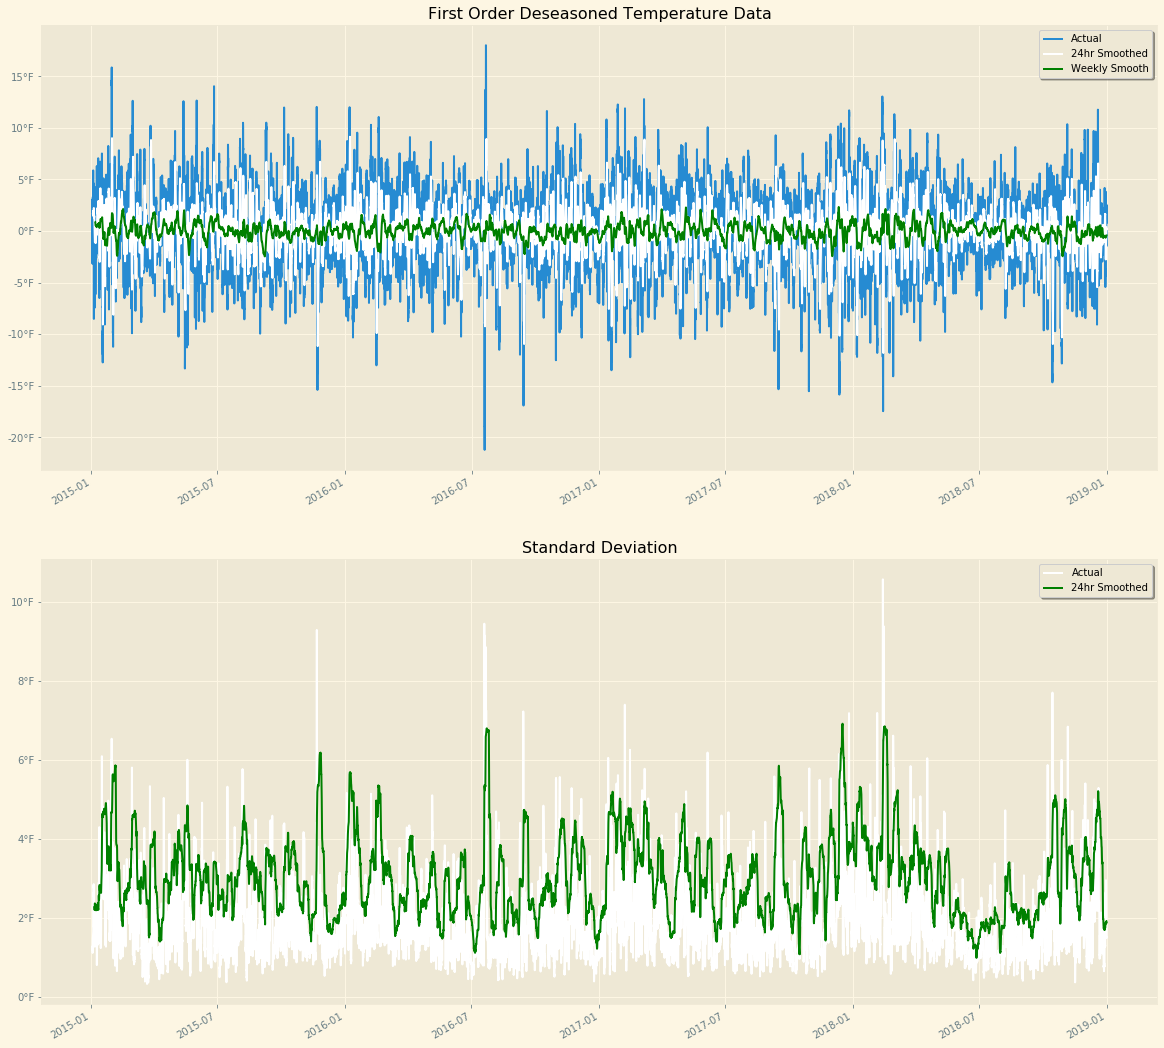

In [17]:
#Import timeseries_plot
from TimeseriesPlotter import timeseries_plot

###visualize residuals
f, ax = plt.subplots(2,1,figsize = (20,20))

#Plot deseasoned data 
timeseries_plot(df.temp_deseasoned1, ax = ax[0])
timeseries_plot(df.temp_deseasoned1.rolling(24,24).mean(), color = 'white',ax = ax[0])#24 hrs
timeseries_plot(df.temp_deseasoned1.rolling(24*7,24*4).mean(),title= 'First Order Deseasoned Temperature Data',
                color = 'g',ax = ax[0])#7 days

timeseries_plot(df.temp_deseasoned1.rolling(24,24).std(), color = 'white',ax = ax[1])#24 hrs
timeseries_plot(df.temp_deseasoned1.rolling(24*7,24*4).std(), 
                title = 'Standard Deviation', color = 'g',ax = ax[1])#7 days
###Set plot aesthetics###
#Axes
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}°F".format(int(x))))

#Legend
ax[0].legend(['Actual', '24hr Smoothed', 'Weekly Smooth'], 
            fancybox = True, shadow = True, frameon = True)
ax[1].legend(['Actual', '24hr Smoothed', 'Weekly Smooth'], 
            fancybox = True, shadow = True, frameon = True);

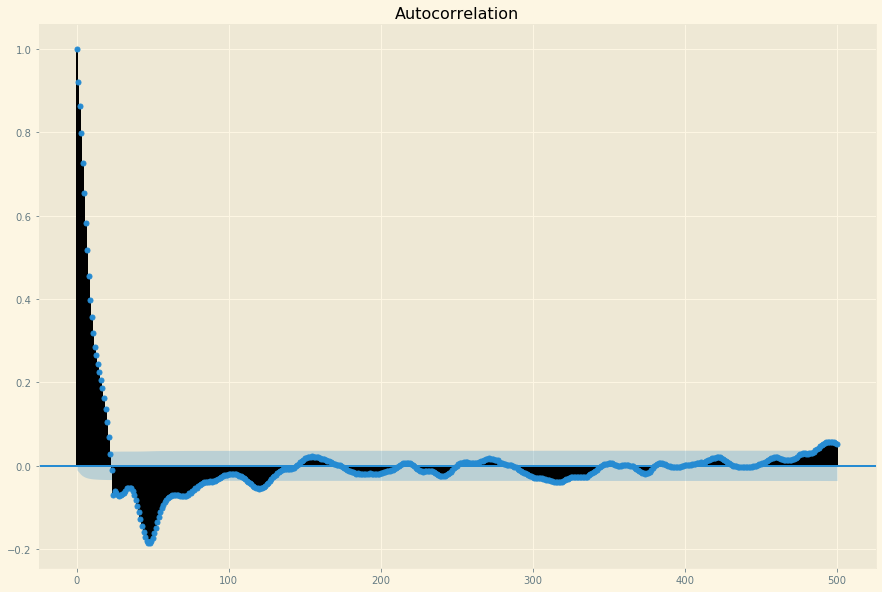

In [22]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (15,10))

#Fit to data
plot_acf(df.temp_deseasoned1[24:], lags = 500, ax = ax);

### Test deseasoned temperature data for stationarity

In [23]:
#Import StationarityTests
from StationarityTests import ADF_KPSS_test, mean_var_test

#Test deseasoned temp
ADF_KPSS_test(df.temp_deseasoned1, 24)

ADF Statistic: -26.439818545382114
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.05616390058085456
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [24]:
#View metrics variance and mean stats
mean_var_test(df.temp_deseasoned1,24)

Mean1: 0.005729141891120708
Mean2: 0.003017119379137223
Var1: 10.271759317017759
Var2: 11.299684827148322


# Feature Engineering

**Appending rolling mean for smoother data**

In [ ]:
#Appending a daily smoothed version of deseasoned data
df['temp_24hr_smooth']= df.temp.rolling(24,24).mean()

#Appending a weekly smoothed version of deseasoned data
df['temp_weekly_smooth']= df.temp.rolling(24*7,24*4).mean()

#Appending a daily smoothed version of deseasoned data
df['deseasoned_24hr_smooth']= df.temp_deseasoned1.rolling(24,24).mean()

#Appending a weekly smoothed version of deseasoned data
df['deseasoned_weekly_smooth']= df.temp_deseasoned1.rolling(24*7,24*4).mean()

#Drop rows with missing values
df.dropna(inplace=True)

#Check
display(df.head())

# Write CSV's

**Split data into train and test sets**

In [ ]:
#Set split point to capture 80% of data for training
split = round(len(df) * .8)

#Assign 80% of data to temp_train and 20% to temp_test
temp_train = df[:split]
temp_test = df[split:]

#Check 
print('Training data shape: ',temp_train.shape)
print('Test data shape: ',temp_test.shape)

**Write files to CSV**

In [ ]:
#Write temp_train and temp_test to files
temp_train.to_csv(path + '/Data/03_Processed_Data/2020_0515_temp_train.csv')
temp_test.to_csv(path + '/Data/03_Processed_Data/2020_0515_temp_test.csv')